In [84]:
%pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [87]:
import spotipy 
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


import pathlib
import os
import yaml

import pandas as pd 

from dotenv import load_dotenv
load_dotenv()

import matplotlib.pyplot as plt
import seaborn as sns

# from data_functions

# Authentication 

In [88]:
scope = "user-library-read user-follow-read user-top-read playlist-read-private playlist-modify-public user-top-read user-read-recently-played"
client_id = os.getenv('client_id')
client_secret = os.getenv('client_secret')
username = os.getenv("username")
redirect_uri = "http://localhost:8080/callback"

In [89]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, 
                                                      client_secret=client_secret)
                                                      
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

token = util.prompt_for_user_token(username, scope, client_id, client_secret, redirect_uri)
if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

# Data exploration #

Experimenting with my current top songs in order to understand the structure of the data Spotify provides for later use in my project.

In [90]:
def get_tracks_df(tracks):
    """
    tracks : the results of a query to spotify with .current_user_top_tracks()
    Returns
    -------
    df: DataFrame containing 'track_name', 'track_id', 'artist_name', 'artist_id', 'album_name', 'album_id', 'duration_ms', 'disc_number', duration,, popularity
    """
    tracks = tracks['items']
    tracks_df = pd.DataFrame(tracks)

    tracks_df['track_name'] = tracks_df['name']
    tracks_df['track_id'] = tracks_df['id']
    tracks_df['artist_name'] = tracks_df['artists'].apply(lambda x: x[0]['name'])
    tracks_df['artist_id'] = tracks_df['artists'].apply(lambda x: x[0]['id'])
    tracks_df['album_name'] = tracks_df['album'].apply(lambda x: x['name'])
    tracks_df['album_id'] = tracks_df['album'].apply(lambda x: x['id'])

    select_columns = ['track_name', 'track_id', 'artist_name', 'artist_id', 'album_name', 'album_id', 'duration_ms', 'popularity']
    return tracks_df[select_columns]



top tracks info substraction

In [94]:
top_tracks = sp.current_user_top_tracks(limit = 50,offset=0)
top_tracks_df = get_tracks_df(top_tracks)
# top_tracks_df


# Audio features

Analysing the audio features Spotify provides for each song.
- https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features


In [98]:
top_tracks_audio = sp.audio_features(top_tracks_df["track_id"])
top_tracks_audio_df = pd.DataFrame(top_tracks_audio)
top_tracks_all_df = pd.concat([top_tracks_df,top_tracks_audio_df],axis = 1)
top_tracks_all_df.head()
# top_tracks_audio_df

,track_name,track_id,artist_name,artist_id,album_name,album_id,duration_ms,popularity,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Mask Off,0VgkVdmE4gld66l8iyGjgx,Future,1RyvyyTE3xzB2ZywiAwp0i,FUTURE,17FBoXK1NU2rvJBbzdzw0r,204600,80,0.833,0.434,...,0.165,0.281,150.062,audio_features,0VgkVdmE4gld66l8iyGjgx,spotify:track:0VgkVdmE4gld66l8iyGjgx,https://api.spotify.com/v1/tracks/0VgkVdmE4gld...,https://api.spotify.com/v1/audio-analysis/0Vgk...,204600,4
1,Bliss,2hkGd89f1mtUp19libeWmR,Yung Lean,67lytN32YpUxiSeWlKfHJ3,Stardust,7v6htsHRSZ34XJCki1uZxB,171425,56,0.684,0.809,...,0.129,0.886,126.660,audio_features,2hkGd89f1mtUp19libeWmR,spotify:track:2hkGd89f1mtUp19libeWmR,https://api.spotify.com/v1/tracks/2hkGd89f1mtU...,https://api.spotify.com/v1/audio-analysis/2hkG...,171425,4
2,Dragonborn,2gaZJDgE71VL9PzzUUlpMg,Jeremy Soule,77yY2QmM6bYvjJ3y5L2R0v,The Elder Scrolls V: Skyrim: Original Game Sou...,25r7pEf31viAbsoVHC6bQ4,235636,58,0.413,0.482,...,0.111,0.130,66.766,audio_features,2gaZJDgE71VL9PzzUUlpMg,spotify:track:2gaZJDgE71VL9PzzUUlpMg,https://api.spotify.com/v1/tracks/2gaZJDgE71VL...,https://api.spotify.com/v1/audio-analysis/2gaZ...,235636,4
3,Nonstop,0TlLq3lA83rQOYtrqBqSct,Drake,3TVXtAsR1Inumwj472S9r4,Scorpion,1ATL5GLyefJaxhQzSPVrLX,238614,77,0.912,0.412,...,0.104,0.423,154.983,audio_features,0TlLq3lA83rQOYtrqBqSct,spotify:track:0TlLq3lA83rQOYtrqBqSct,https://api.spotify.com/v1/tracks/0TlLq3lA83rQ...,https://api.spotify.com/v1/audio-analysis/0TlL...,238614,4
4,MŁODY PADEREWSKI,05MYJf19LSo2E1lZ0RrMAC,Mata,0MIG6gMcQTSvFbKvUwK0id,MŁODY PADEREWSKI,4qN47N0th8re2Xi09s3fss,130285,68,0.478,0.914,...,0.267,0.527,139.885,audio_features,05MYJf19LSo2E1lZ0RrMAC,spotify:track:05MYJf19LSo2E1lZ0RrMAC,https://api.spotify.com/v1/tracks/05MYJf19LSo2...,https://api.spotify.com/v1/audio-analysis/05MY...,130286,4


# Study of relationships between variables

Correlation matrix 
- used to represent the relationship between the variables in the data set. It helps to analyze the relationship between data components. It represents the correlation coefficient between 0 and 1.
- a positive value implies a good correlation, a negative value shows a weak/low correlation, and a value of zero(0) indicates no dependency between the given set of variables.

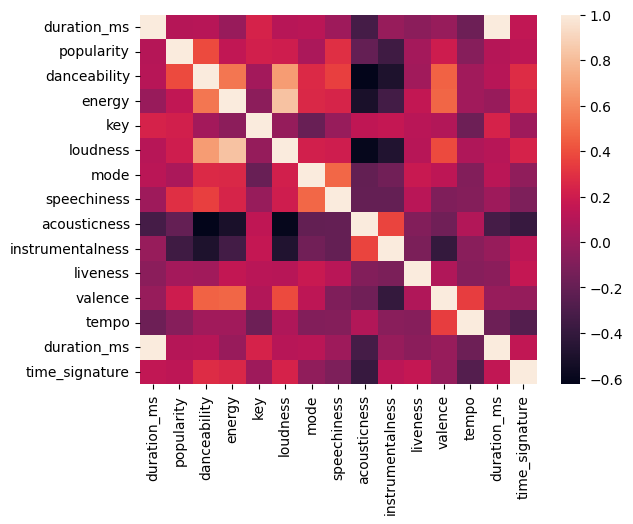

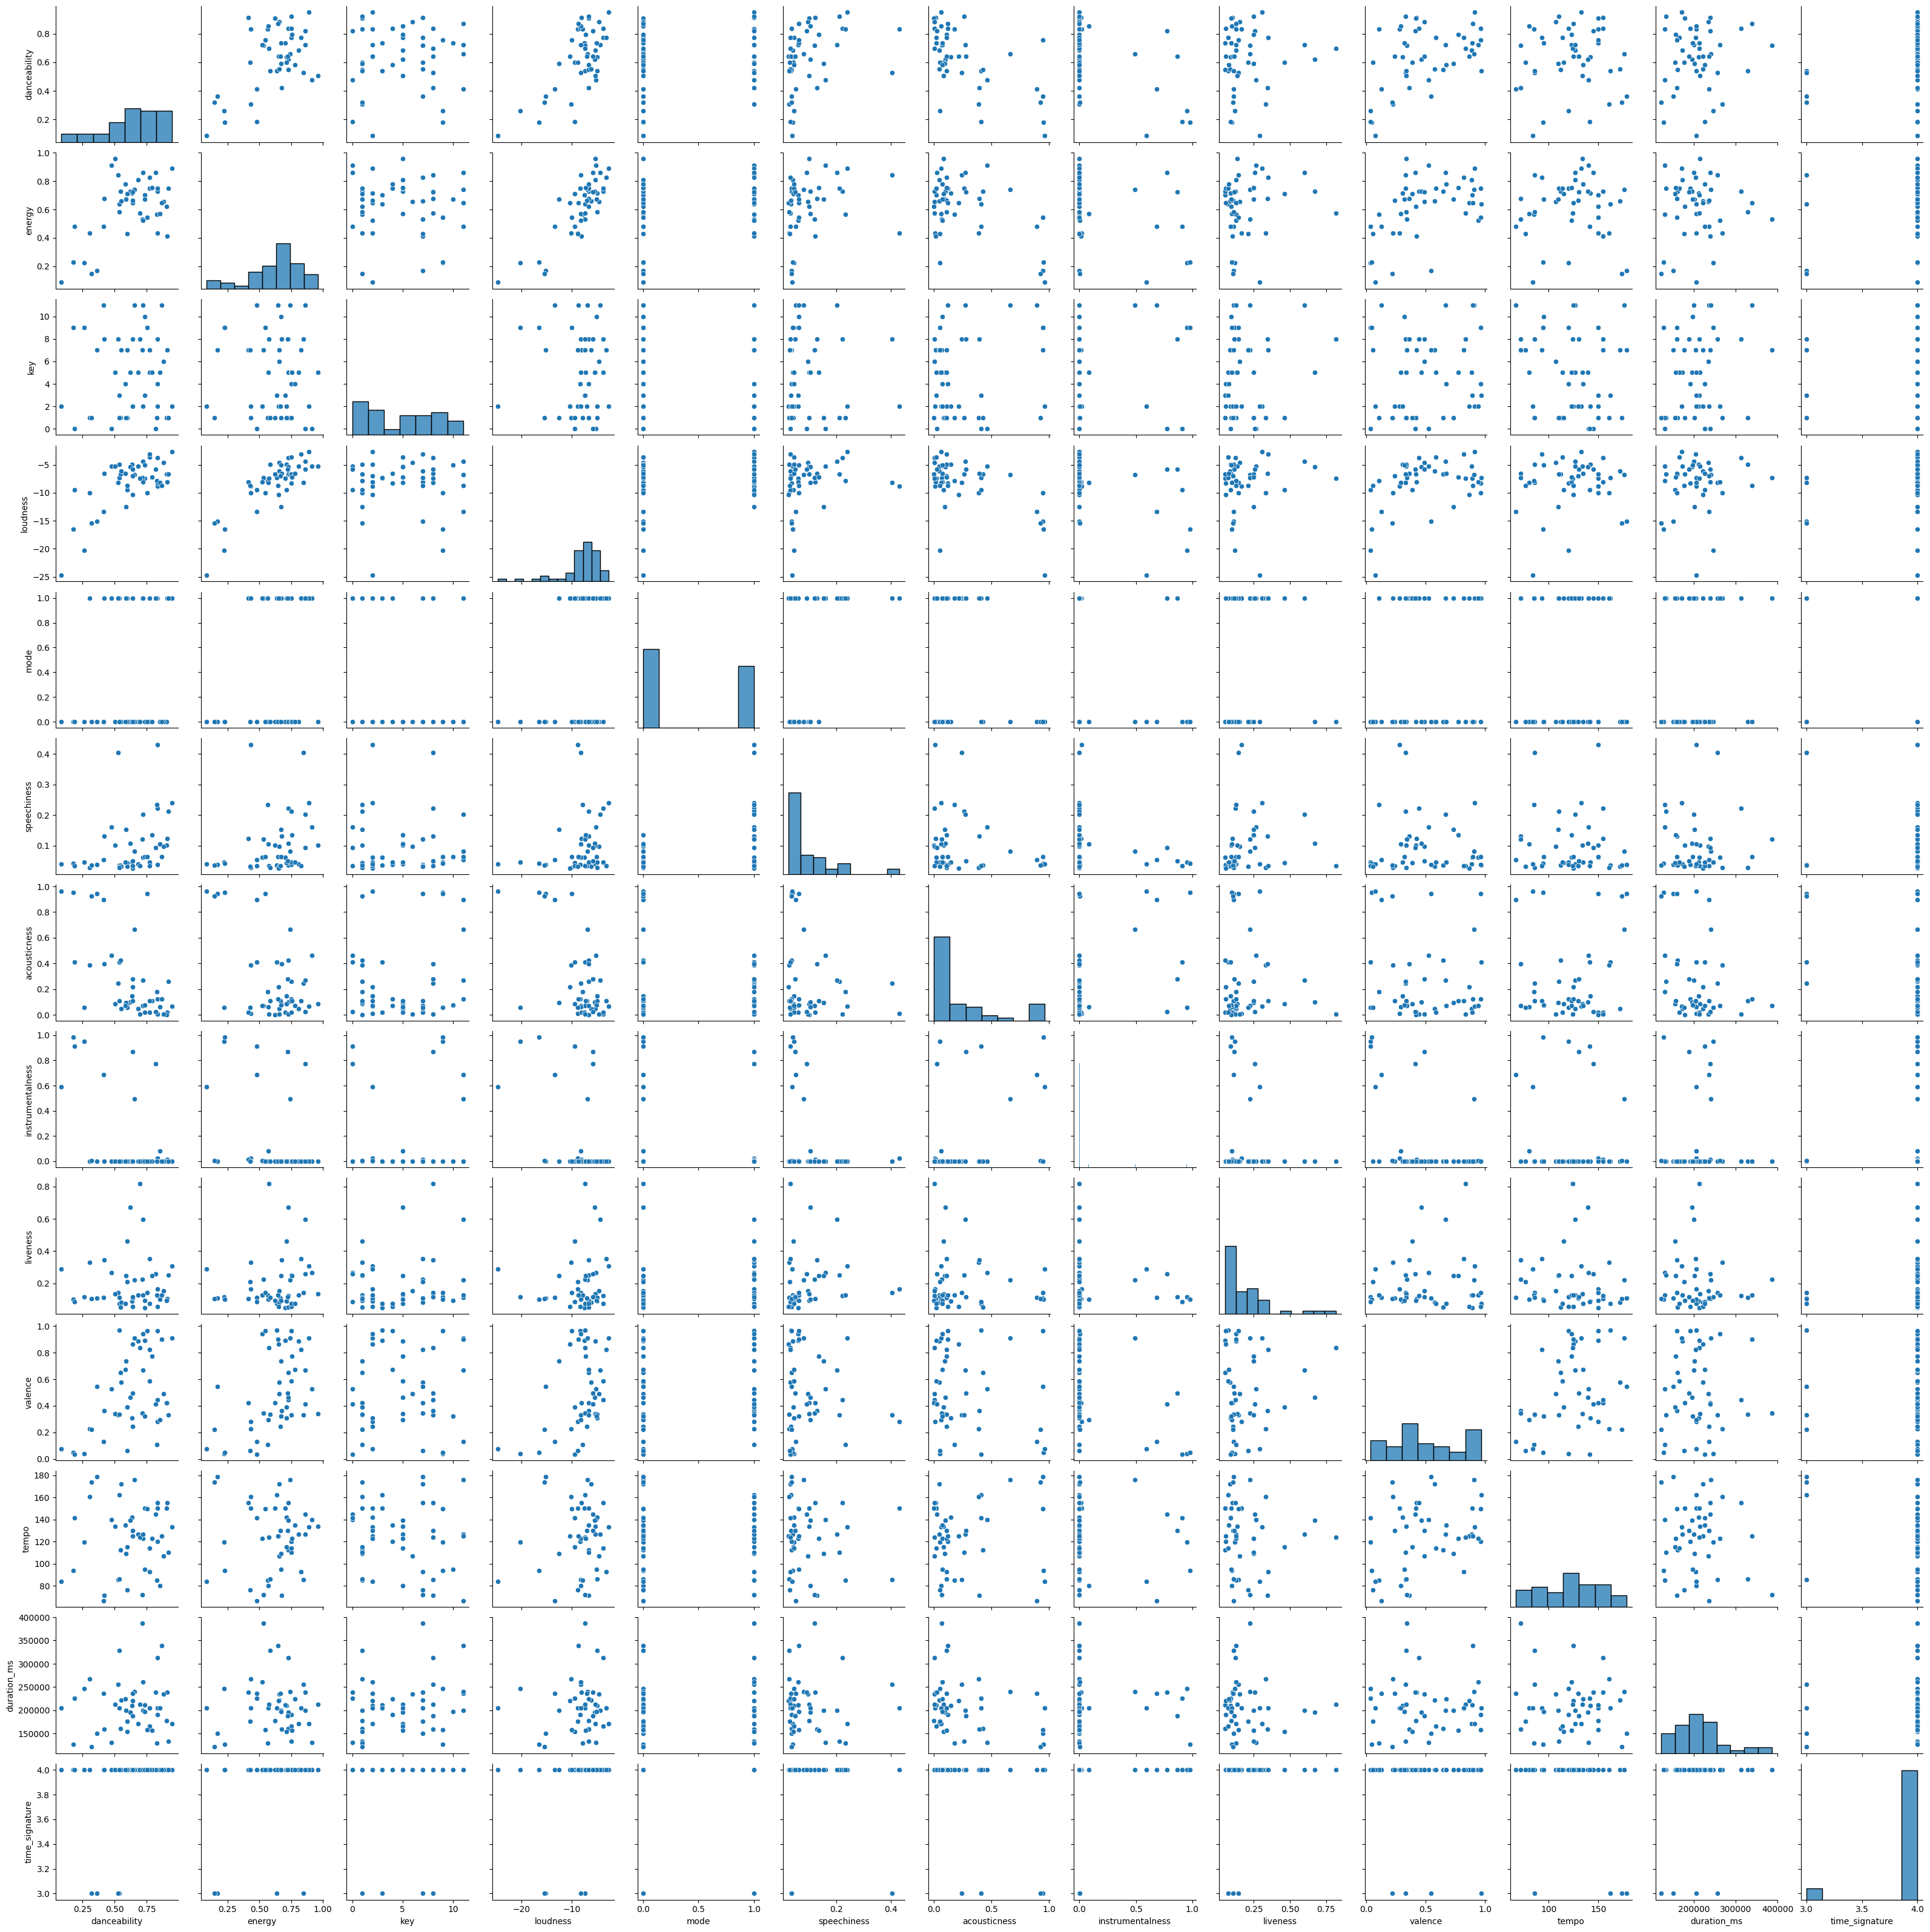

In [105]:
sns.heatmap(top_tracks_all_df.corr())
sns.pairplot(top_tracks_audio_df)

# Exploring Similarity Measures and Recommendations


In [106]:
#get cosine similarity for all songs within the playlist get songs that are similar
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

Choosing numeric columns in Pandas

In [118]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# selecting only numeric columns
num_cols_df = top_tracks_all_df.select_dtypes(include=numerics)


In [123]:
df_features_scaled = StandardScaler().fit_transform(num_cols_df)
df_features_scaled
cosine_sim = linear_kernel(df_features_scaled, df_features_scaled)
cosine_sim


array([[ 2.14578941e+01, -4.78195499e+00, -8.15557384e+00, ...,
        -4.03024698e+00, -3.92809137e+00, -3.04637672e+00],
       [-4.78195499e+00,  6.76163096e+00, -4.71871035e+00, ...,
         2.72553459e+00,  4.08890496e+00,  2.86795328e-01],
       [-8.15557384e+00, -4.71871035e+00,  2.20751919e+01, ...,
         3.46579788e+00, -2.79120054e+00,  4.74057605e+00],
       ...,
       [-4.03024698e+00,  2.72553459e+00,  3.46579788e+00, ...,
         1.42074936e+01, -1.73014077e-03,  1.14855006e-01],
       [-3.92809137e+00,  4.08890496e+00, -2.79120054e+00, ...,
        -1.73014077e-03,  4.23551533e+00, -8.01135911e-01],
       [-3.04637672e+00,  2.86795328e-01,  4.74057605e+00, ...,
         1.14855006e-01, -8.01135911e-01,  1.03348488e+01]])

In [124]:
indices = pd.Series(top_tracks_all_df.index, index = top_tracks_all_df['track_name']).drop_duplicates()
indices

track_name
Mask Off                                                                   0
Bliss                                                                      1
Dragonborn                                                                 2
Nonstop                                                                    3
MŁODY PADEREWSKI                                                           4
Super Freaky Girl                                                          5
STAR WALKIN' (League of Legends Worlds Anthem)                             6
INDUSTRY BABY (feat. Jack Harlow)                                          7
Negro Y Azul: The Ballad of Heisenberg (From "Breaking Bad" TV Series)     8
Dream On                                                                   9
California Dreamin'                                                       10
Szarość i Róż                                                             11
SICKO MODE                                                       

# Recommendations

In [128]:
def get_recommendations(song_title, df, similarity_score = cosine_sim):
    # Get the index of the song given its title.
    idx = indices[song_title]
    # Get the list of cosine similarity scores for that particular song with all song. Convert it into a list of tuples where the first element is its position, 
    # and the second is the similarity score.
    sim_scores = list(enumerate(similarity_score[idx]))
    # Sort the list of tuples based on the similarity scores; that is, the second element.
    sim_scores = sorted(sim_scores, key = lambda x: x[1],reverse = True)
    # Get the top 5 elements of this list. Ignore the first element as it refers to self (the song most similar to a particular song is the song itself).
    top_scores = sim_scores[0:6]
    # Return the titles corresponding to the indices of the top elements.
    song_indices = [i[0] for i in top_scores]
    return df["track_name"].iloc[song_indices]

In [133]:
get_recommendations("The Dragonborn Comes", top_tracks_all_df)


43                                 The Dragonborn Comes
18                                        Via del campo
42                                            Lacrimosa
37                                      Cornfield Chase
8     Negro Y Azul: The Ballad of Heisenberg (From "...
38    Evil Morty Theme (For The Damaged Coda) - Epic...
Name: track_name, dtype: object